## Data import and treatment

In [1]:
import pandas as pd
import numpy as np

In [2]:

# Chargement des données des prénoms
df_prenoms = pd.read_csv('/Users/anthonyivanier/Desktop/Ensae/3A/NLP/firstname_with_sex.csv', sep=';')

# Chargement des transcriptions
df_transcriptions = pd.read_csv('/Users/anthonyivanier/Desktop/Ensae/3A/NLP/transcriptions_with_sex.csv')


In [3]:
df_prenoms.head(27)


,firstname,male,female
0,marie,10145,2390322
1,jean,1869615,6476
2,pierre,1475841,5047
3,jeanne,1765,1097397
4,françois,1089009,5951
5,joseph,897742,4246
6,anne,1479,816241
7,marguerite,1441,813859
8,catherine,1223,792448
9,louis,750498,2720


In [4]:
df_prenoms_with_space_or_hyphen = df_prenoms[df_prenoms['firstname'].str.contains(' |-', regex=True)]
print(df_prenoms_with_space_or_hyphen['firstname'])


Series([], Name: firstname, dtype: object)


In [5]:
print(df_prenoms.shape , df_transcriptions.shape)

(6946, 3) (241, 4)


In [6]:
df_transcriptions.head()


,subject_line,groundtruth,prediction,sex
0,ebb26ada-044c-4c62-9dbc-a9c8d505d31c,surname: Chardon firstname: Marie occupation: ...,nom: Chardon prénom: Marie date_naissance: 30 ...,femme
1,338496f5-e4ca-43ac-aa5c-429cb3f6ac00,surname: Lhopital firstname: Louis-Jean occupa...,nom: Lhopital prénom: Louis Jean date_naissanc...,homme
2,e6a279da-9b6f-4f49-b498-64857bc50d1e,surname: Papin firstname: Marie occupation: id...,nom: Pyrin prénom: Marie date_naissance: 55 re...,femme
3,7534deca-39e8-4f00-be17-c12460015de1,surname: Lavocat firstname: Marie link: femme ...,nom: Lavocat prénom: Marie date_naissance: 187...,femme
4,ef334a66-a504-418a-9872-e7c9db923488,surname: Benne firstname: Marguerite age: 78,nom: Benne prénom: Marguerite date_naissance: ...,femme


In [7]:

# Set the display option to print the entire line
pd.set_option('display.max_colwidth', None)

df_transcriptions.iloc[0,:]


subject_line                                       ebb26ada-044c-4c62-9dbc-a9c8d505d31c
groundtruth     surname: Chardon firstname: Marie occupation: idem link: fille age: 30 
prediction            nom: Chardon prénom: Marie date_naissance: 30 lieux_naissance: " 
sex                                                                               femme
Name: 0, dtype: object

In [8]:
# Probalité des sexes des prénoms
df_prenoms['total'] = df_prenoms['male'] + df_prenoms['female']
df_prenoms['gender_probability'] = df_prenoms['female'] / df_prenoms['total']

Let's exctract first_name

In [9]:
'''def extract_firstname(text):
    # Extraction du prénom à partir de la colonne groundtruth ou prediction
    parts = text.split()
    for i, part in enumerate(parts):
        if part in ["firstname:", "prénom:"]:
            return parts[i+1]  # Retourne le prénom qui suit ces indicateurs
    return None
    '''

def extract_firstname(text):
    # Extraction du prénom à partir de la colonne groundtruth ou prediction
    parts = text.split()
    for i, part in enumerate(parts):
        if part in ["firstname:", "prénom:"]:
            firstname = parts[i+1]  
            
            
            if i+2 < len(parts) and parts[i+2].isalpha():
                firstname += " " + parts[i+2]
            
            return firstname
    return None


df_transcriptions['extracted_firstname_gt'] = df_transcriptions['groundtruth'].apply(extract_firstname)
df_transcriptions['extracted_firstname_gt'] = df_transcriptions['extracted_firstname_gt'].str.lower()

#
df_transcriptions['extracted_firstname_pred'] = df_transcriptions['prediction'].apply(extract_firstname)  
df_transcriptions['extracted_firstname_pred'] = df_transcriptions['extracted_firstname_pred'].str.lower()

# Column 'sex' en binaire
df_transcriptions['sex_binary'] = df_transcriptions['sex'].map({'femme': 1, 'homme': 0, 'ambigu': float('nan')})


In [10]:

for i in range(len(df_transcriptions)):
    if df_transcriptions['extracted_firstname_gt'].iloc[i] != df_transcriptions['extracted_firstname_pred'].iloc[i]:
        print(df_transcriptions['extracted_firstname_gt'].iloc[i], df_transcriptions['extracted_firstname_pred'].iloc[i])


louis-jean louis jean
antoine angène
alexandre herandre
marguerite oarguerite
virginie vigmie
eugènie eugénie
josèphine joséphine
anroine antoine
justine gustine
clément clement
antoine angloise
françois feris
eugènie eugénie
jacques jregues
claude vaude
jean-marie jean marie
gilbert gilbeuse
branislav branistau
stanislas mamiolas
None eugéne
madeleine gadeleine
etiennette ctiennette
antoine aupène
claude clause
gilbert gilbeup
pierre anne
marthe marthy
alix alice
françoise faul
françois antoine zean antoine
antonie entonie
jean-baptiste jean-haptiste
jean-claude jean blanse
victor vicher
madeleine mareleine
jean raymond jean-raymond
france franco
blaise clause
baptiste bt
simon simone
marie-louise marie s
madeleine vadeleine
théodore théodote
barthélémy barthe
françois ferd
pétronille gihromille


In [11]:
df_transcriptions.head(3)

,subject_line,groundtruth,prediction,sex,extracted_firstname_gt,extracted_firstname_pred,sex_binary
0,ebb26ada-044c-4c62-9dbc-a9c8d505d31c,surname: Chardon firstname: Marie occupation: idem link: fille age: 30,"nom: Chardon prénom: Marie date_naissance: 30 lieux_naissance: """,femme,marie,marie,1.0
1,338496f5-e4ca-43ac-aa5c-429cb3f6ac00,surname: Lhopital firstname: Louis-Jean occupation: sp link: chef age: 67,nom: Lhopital prénom: Louis Jean date_naissance: 67 lieux_naissance: Sn employeur: ahef,homme,louis-jean,louis jean,0.0
2,e6a279da-9b6f-4f49-b498-64857bc50d1e,surname: Papin firstname: Marie occupation: idem link: idem employer: idem age: 15,nom: Pyrin prénom: Marie date_naissance: 55 relation: d,femme,marie,marie,1.0


Let's exctract other data

In [12]:
def extract_occupation(text):
    parts = text.split()
    for i, part in enumerate(parts):
        if part == "occupation:":
            return parts[i+1]
    return None

def extract_link(text):
    parts = text.split()
    for i, part in enumerate(parts):
        if part == "link:":
            return parts[i+1]
    return None

def extract_profession(text):
    parts = text.split()
    for i, part in enumerate(parts):
        if part == "profession:":
            return parts[i+1]
    return None

def extract_relation(text):
    parts = text.split()
    for i, part in enumerate(parts):
        if part == "relation:":
            return parts[i+1]
    return None



In [13]:
# Merge based on extracted firstname
df_combined = pd.merge(df_transcriptions,
                       df_prenoms[['firstname', 'gender_probability']],
                       left_on='extracted_firstname_gt',
                       right_on='firstname',
                       how='left')


df_combined_pred = pd.merge(df_transcriptions,
                       df_prenoms[['firstname', 'gender_probability']],
                       left_on='extracted_firstname_pred',  # using predicted instead of groundtruth
                       right_on='firstname',
                       how='left')

In [14]:
df_transcriptions['occupation'] = df_combined['groundtruth'].apply(extract_occupation)
df_transcriptions['link'] = df_combined['groundtruth'].apply(extract_link)
df_transcriptions['profession'] = df_combined_pred['prediction'].apply(extract_profession)
df_transcriptions['relation'] = df_combined_pred['prediction'].apply(extract_relation)

In [15]:
df_combined['occupation'] = df_combined['groundtruth'].apply(extract_occupation)
df_combined['link'] = df_combined['groundtruth'].apply(extract_link)
df_combined_pred['profession'] = df_combined_pred['prediction'].apply(extract_profession)
df_combined_pred['relation'] = df_combined_pred['prediction'].apply(extract_relation)

In [16]:
df_combined.head(2)

,subject_line,groundtruth,prediction,sex,extracted_firstname_gt,extracted_firstname_pred,sex_binary,firstname,gender_probability,occupation,link
0,ebb26ada-044c-4c62-9dbc-a9c8d505d31c,surname: Chardon firstname: Marie occupation: idem link: fille age: 30,"nom: Chardon prénom: Marie date_naissance: 30 lieux_naissance: """,femme,marie,marie,1.0,marie,0.995774,idem,fille
1,338496f5-e4ca-43ac-aa5c-429cb3f6ac00,surname: Lhopital firstname: Louis-Jean occupation: sp link: chef age: 67,nom: Lhopital prénom: Louis Jean date_naissance: 67 lieux_naissance: Sn employeur: ahef,homme,louis-jean,louis jean,0.0,NaN,NaN,sp,chef


In [17]:
pd.set_option('display.max_rows', None)


In [18]:
unique_sex_values = df_combined['sex'].unique()
print(unique_sex_values)


['femme' 'homme' 'ambigu']


In [19]:
link_counts = df_transcriptions.groupby('link')['sex'].value_counts().unstack().fillna(0)
print(link_counts)

sex           ambigu  femme  homme
link                              
Chef             0.0    1.0    2.0
Domestique       0.0    1.0    0.0
Fils             0.0    0.0    1.0
Leur             0.0    0.0    1.0
Sa               0.0    2.0    0.0
Schouer          0.0    1.0    0.0
Son              0.0    0.0    1.0
assisté          0.0    0.0    2.0
belle-mère       0.0    3.0    0.0
bru              0.0    3.0    0.0
ch.              0.0    0.0    3.0
chef             4.0    6.0   43.0
domest.          0.0    1.0    0.0
domestique       0.0    1.0    4.0
enf              0.0    1.0    0.0
enfant           1.0    9.0   13.0
femme            0.0   20.0    0.0
fille            0.0   13.0    0.0
fils             0.0    0.0   18.0
frère            0.0    0.0    2.0
idem             4.0    8.0   17.0
leur             0.0    1.0    5.0
mère             0.0    4.0    0.0
mére             0.0    1.0    0.0
ouvrier          0.0    0.0    1.0
pensionnaire     0.0    0.0    1.0
petit-fils       0.0

In [20]:
occupation_counts = df_transcriptions.groupby('occupation')['sex'].value_counts().unstack().fillna(0)
print(occupation_counts)

sex              ambigu  femme  homme
occupation                           
Cultivateur         0.0    0.0    1.0
Domestique          0.0    1.0    0.0
Garde               0.0    0.0    1.0
Métayer             0.0    0.0    1.0
Propriétaire        0.0    0.0    1.0
Sans                0.0    1.0    0.0
agent               0.0    0.0    1.0
argentière          0.0    1.0    0.0
blanchiseuse        0.0    1.0    0.0
boulanger           0.0    1.0    0.0
buraliste           0.0    0.0    1.0
cantonnier          0.0    0.0    1.0
charcutier          0.0    0.0    1.0
charretier          0.0    0.0    1.0
clerc               0.0    0.0    1.0
coiffeur            0.0    0.0    1.0
couturière          0.0    1.0    0.0
couvreur            0.0    0.0    1.0
culivateur          0.0    0.0    1.0
cullotière          0.0    1.0    0.0
cult                0.0    0.0    3.0
cultiv              0.0    0.0    1.0
cultivat            0.0    1.0    0.0
cultivateur         1.0    0.0   12.0
cultivatrice

In [21]:
# number of nan values in the firstname column
print(df_combined['firstname'].isna().sum(),df_combined_pred['firstname'].isna().sum())

11 37


In [22]:
df_combined.shape

(241, 11)

### Stats descriptives

In [23]:
descriptive_stats = df_prenoms.describe()

# Proportion of each sex 
total_male = df_prenoms['male'].sum()
total_female = df_prenoms['female'].sum()
total = total_male + total_female

male_percentage = (total_male / total) * 100
female_percentage = (total_female / total) * 100


print(descriptive_stats)

print(f"Pourcentage de prénoms masculins: {male_percentage:.2f}%")
print(f"Pourcentage de prénoms féminins: {female_percentage:.2f}%")

               male        female         total  gender_probability
count  6.946000e+03  6.946000e+03  6.946000e+03         6946.000000
mean   2.084710e+03  1.795356e+03  3.880067e+03            0.510974
std    3.725168e+04  3.738858e+04  5.290102e+04            0.477295
min    0.000000e+00  0.000000e+00  1.000000e+01            0.000000
25%    0.000000e+00  0.000000e+00  1.600000e+01            0.000000
50%    1.100000e+01  1.200000e+01  3.500000e+01            0.631579
75%    4.000000e+01  4.300000e+01  1.450000e+02            1.000000
max    1.869615e+06  2.390322e+06  2.400467e+06            1.000000
Pourcentage de prénoms masculins: 53.73%
Pourcentage de prénoms féminins: 46.27%


In [24]:
print(total_male,total_female)

14480397 12470545


## First predictions :

### Let's start with the clean data : using only the probability of the first name being in one gender (ground truth data)

In [25]:
# Predict gender based on gender probability
df_combined['predicted_gender_proba_only'] = df_combined['gender_probability'].apply(lambda x: 1 if x > 0.5 else 0)

# Compute accuracy
accuracy = (df_combined['predicted_gender_proba_only'] == df_combined['sex_binary']).mean()
print("Baseline accuracy:", accuracy)

# Accuracy is 0.95 with the baseline. It is a good results but we have to keep in mind that the data is clean.


Baseline accuracy: 0.9543568464730291


In [26]:

print(df_combined['sex_binary'].isna().sum()/len(df_combined))



0.03734439834024896


### Now with predicted data

In [27]:
# Predict gender based on gender probability
df_combined_pred['predicted_gender_proba_only'] = df_combined_pred['gender_probability'].apply(lambda x: 1 if x > 0.5 else 0)

# Compute accuracy
accuracy = (df_combined_pred['predicted_gender_proba_only'] == df_combined_pred['sex_binary']).mean()
print("Baseline accuracy:", accuracy)




# 90% accuraccy on the prediction data


Baseline accuracy: 0.9045643153526971


In [28]:
# Predict gender based on gender probability
df_combined_pred['predicted_gender_proba_only'] = df_combined_pred['gender_probability'].apply(lambda x: 1 if x > 0.5 else (0 if x <= 0.5 else x))
# Compute accuracy
accuracy = (df_combined_pred['predicted_gender_proba_only'] == df_combined_pred['sex_binary']).mean()
print("Baseline accuracy:", accuracy)






Baseline accuracy: 0.8049792531120332


### Now let's take into account the links and occupations

In [75]:
# Define the lists for male and female links and occupations
male_links = ['Son', 'Fils', 'Père', 'Frère','Chef']
female_links = ['Fille', 'Fils', 'Mère', 'Soeur']
#male_occupations = ['Chef'] # men were the only chef of the house at the time of the dataset
#female_occupations = ['Femme']

# Define a function to determine the predicted gender based on link and occupation
'''
def predict_gender_gt(row):
    if row['link'] in male_links:
        return 0
    elif row['link'] in female_links:
        return 1
#    elif row['occupation'] in male_occupations:
#        return 0
#    elif row['occupation'] in female_occupations:
#        return 1
    else:
        return 1 if row['gender_probability'] > 0.5
'''
def predict_gender_gt(row):
    if row['link'] in male_links:
        return 0
    elif row['link'] in female_links:
        return 1
    else:
        # Check if the value is NaN
        if np.isnan(row['gender_probability']):
            return np.nan
        else:
            return 1 if row['gender_probability'] > 0.5 else 0
    
'''    
def predict_gender_pred(row):
    if row['relation'] in male_links:
        return 0
    elif row['relation'] in female_links:
        return 1
#    elif row['profession'] in male_occupations:
#        return 0
#    elif row['profession'] in female_occupations:
#        return 1
    else:
        return 1 if row['gender_probability'] > 0.5 else 0    
'''



def predict_gender_pred(row):
    if row['relation'] in male_links:
        return 0
    elif row['relation'] in female_links:
        return 1
    
    # elif row['profession'] in male_occupations:
    #     return 0
    # elif row['profession'] in female_occupations:
    #     return 1
    else:
        if np.isnan(row['gender_probability']):
            return np.nan
        else:
            return 1 if row['gender_probability'] > 0.5 else 0



# Create the predicted_gender_all_data column
df_combined['predicted_gender_all_data'] = df_combined.apply(predict_gender_gt, axis=1)
df_combined_pred['predicted_gender_all_data'] = df_combined_pred.apply(predict_gender_pred, axis=1)


In [76]:
accuracy = (df_combined_pred['predicted_gender_all_data'] == df_combined_pred['sex_binary']).mean()
print("Accuracy:", accuracy)

#Accuracy of 80% 

Accuracy: 0.8008298755186722


In [84]:
df_combined_pred_no_nan = df_combined_pred.dropna(subset=['gender_probability'])

accuracy = (df_combined_pred_no_nan['predicted_gender_all_data'] == df_combined_pred_no_nan['sex_binary']).mean()
print("Accuracy:", accuracy)

#Accuracy of 94%

Accuracy: 0.946078431372549


## Let's try NLP models ! 

### Zero shot prediction

Zero shot on ground truth data

In [ ]:

''' can be long to run
from transformers import pipeline

# Initialize zero-shot classification pipeline
classifier = pipeline("zero-shot-classification")

# Define candidate labels
labels = ["male", "female"]


predictions = []
for text in df_combined['groundtruth']:
    # Predict the label of the text
    result = classifier(text, labels)
    # Get the label with the highest score
    predicted_label = result["labels"][result["scores"].index(max(result["scores"]))]
    predictions.append(predicted_label)

# Add predictions to DataFrame
df_combined['predicted_sex_zero_shot'] = predictions
'''

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Error while downloading from https://cdn-lfs.huggingface.co/facebook/bart-large-mnli/cfbb687dbbd9df99fe865e1860350a22aebac4d26ee4bcb50217f1df606a018e?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1712580526&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxMjU4MDUyNn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9mYWNlYm9vay9iYXJ0LWxhcmdlLW1ubGkvY2ZiYjY4N2RiYmQ5ZGY5OWZlODY1ZTE4NjAzNTBhMjJhZWJhYzRkMjZlZTRiY2I1MDIxN2YxZGY2MDZhMDE4ZT9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSoifV19&Signature=hiTC6XAVmspAo9BeEaFG0kBxjbMieLCIVOBQw4au3XiRi%7EYHlsVNt37hRH7PXZneMDgj1tQP33hNkyxePSBnygWd3Kh8aytfiTYBYuJ5SzrzJI6Syr-jSr5YeM5O0AYC2Gw7XIrlr

In [ ]:
'''
df_combined['predicted_sex_zero_shot_binary'] = df_combined['predicted_sex_zero_shot'].apply(lambda x: 1 if x == 'female' else 0)

accuracy_zero_shot = (df_combined['predicted_sex_zero_shot_binary'] == df_combined['sex_binary']).mean()
accuracy_zero_shot

# 0.937759% accuracy with zero shot classification
'''

0.9377593360995851

In [ ]:
# Initialize zero-shot classification pipeline
classifier = pipeline("zero-shot-classification")

# Define candidate labels
labels = ["male", "female"]


predictions = []
for text in df_combined['prediction']:
    # Predict the label of the text
    result = classifier(text, labels)
    # Get the label with the highest score
    predicted_label = result["labels"][result["scores"].index(max(result["scores"]))]
    predictions.append(predicted_label)

# Add predictions to DataFrame
df_combined_pred['predicted_sex_zero_shot'] = predictions


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of BartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-large-mnli and are newly initialized: ['model.decoder.embed_tokens.weight', 'model.encoder.embed_tokens.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
df_combined_pred['predicted_sex_zero_shot_binary'] = df_combined_pred['predicted_sex_zero_shot'].apply(lambda x: 1 if x == 'female' else 0)

accuracy_zero_shot = (df_combined_pred['predicted_sex_zero_shot_binary'] == df_combined['sex_binary']).mean()
accuracy_zero_shot

#accuracy of 0.8672

0.8672199170124482

In [ ]:
df_combined['gender_probability']

0      0.995774
1           NaN
2      0.995774
3      0.995774
4      0.998233
         ...   
236    0.997709
237    0.004556
238    0.998233
239    0.004232
240    0.997834
Name: gender_probability, Length: 241, dtype: float64

Let's test the model on cases that are impossible for the rule-based model

In [ ]:
# Filter the DataFrame to include only rows where the probability column is NaN
df_filtered = df_combined_pred[df_combined_pred['gender_probability'].isna()]

# Calculate the accuracy
accuracy = (df_filtered['predicted_gender_all_data'] == df_filtered['sex_binary']).mean()

# Print the accuracy
print("Accuracy when probability is NaN:", accuracy)


Accuracy when probability is NaN: 0.6486486486486487


In [ ]:
df_filtered.shape

(37, 13)

## Combining models

In [88]:
# Accuracy des modèles combinés
# accuracy = weighted average of the accuracy of the two models
Accuracy_combined = (65/100)*(37/241) + (94.6/100)*(204/241)
print(Accuracy_combined)

# Accuracy of 90,23% 

0.9005560165975103


## Other models

### Bert training and testing

In [ ]:
'''
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
import torch
from sklearn.model_selection import train_test_split

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenisation et préparation des données pour le modèle
class GenderPredictionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.tokenizer = tokenizer
        self.texts = texts
        self.labels = labels
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        labels = self.labels[idx]
        encoding = self.tokenizer(text, return_tensors='pt', padding='max_length', truncation=True, max_length=512)
        
        # Important: Convert 'BatchEncoding' to a more usable format
        input_ids = encoding['input_ids'].squeeze()  
        attention_mask = encoding['attention_mask'].squeeze() 
        
        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': torch.tensor(labels)}


texts = df_combined['prediction'].tolist()
labels = df_combined['sex_binary'].tolist()

# Division in train and test sets
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Datasets creation
train_dataset = GenderPredictionDataset(texts_train, labels_train, tokenizer)
test_dataset = GenderPredictionDataset(texts_test, labels_test, tokenizer)
'''


/Users/anthonyivanier/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
'''
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy='epoch'
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()
'''


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifi

{'eval_loss': 0.6939376592636108, 'eval_runtime': 5.6103, 'eval_samples_per_second': 8.734, 'eval_steps_per_second': 1.248, 'epoch': 1.0}


 67%|██████▋   | 48/72 [02:51<01:22,  3.43s/it]***** Running Evaluation *****
  Num examples = 49
  Batch size = 8
                                               
 67%|██████▋   | 48/72 [02:57<01:22,  3.43s/it]

{'eval_loss': 0.6911244988441467, 'eval_runtime': 5.6169, 'eval_samples_per_second': 8.724, 'eval_steps_per_second': 1.246, 'epoch': 2.0}


100%|██████████| 72/72 [04:21<00:00,  3.53s/it]***** Running Evaluation *****
  Num examples = 49
  Batch size = 8
                                               
100%|██████████| 72/72 [04:26<00:00,  3.53s/it]

Training completed. Do not forget to share your model on huggingface.co/models =)


100%|██████████| 72/72 [04:26<00:00,  3.71s/it]

{'eval_loss': 0.6831199526786804, 'eval_runtime': 5.6784, 'eval_samples_per_second': 8.629, 'eval_steps_per_second': 1.233, 'epoch': 3.0}
{'train_runtime': 266.9419, 'train_samples_per_second': 2.158, 'train_steps_per_second': 0.27, 'train_loss': 0.6858603689405653, 'epoch': 3.0}


TrainOutput(global_step=72, training_loss=0.6858603689405653, metrics={'train_runtime': 266.9419, 'train_samples_per_second': 2.158, 'train_steps_per_second': 0.27, 'train_loss': 0.6858603689405653, 'epoch': 3.0})

In [ ]:
'''
evaluation_results = trainer.evaluate(test_dataset)
print(evaluation_results)
'''

***** Running Evaluation *****
  Num examples = 49
  Batch size = 8
100%|██████████| 7/7 [00:04<00:00,  1.44it/s]

{'eval_loss': 0.6831199526786804, 'eval_runtime': 5.811, 'eval_samples_per_second': 8.432, 'eval_steps_per_second': 1.205, 'epoch': 3.0}


***** Running Prediction *****
  Num examples = 49
  Batch size = 8
100%|██████████| 7/7 [00:04<00:00,  1.47it/s]


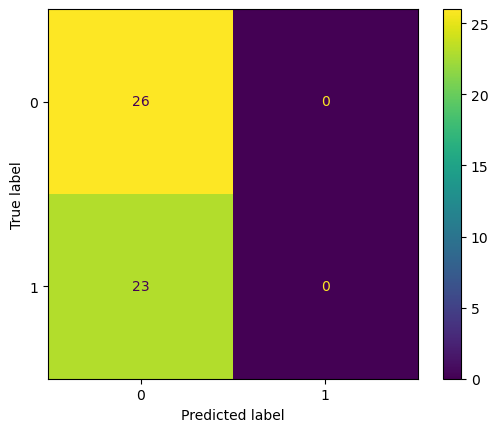

In [ ]:
'''
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


predictions = trainer.predict(test_dataset)
predicted_labels = predictions.predictions.argmax(axis=1)

cm = confusion_matrix(labels_test, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
'''

In [34]:
df_combined_no_nan = df_combined.dropna()

In [72]:

from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
import torch
from sklearn.model_selection import train_test_split

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenization and data preparation for the model
class GenderPredictionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.tokenizer = tokenizer
        self.texts = texts
        self.labels = labels
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = int(self.labels[idx])  # Convert label to integer
        encoding = self.tokenizer(text, return_tensors='pt', padding='max_length', truncation=True, max_length=512)
        
        
        label_one_hot = torch.zeros(2)
        label_one_hot[label] = 1

        
        input_ids = encoding['input_ids'].squeeze()  
        attention_mask = encoding['attention_mask'].squeeze() 
        
        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': label_one_hot}


texts = df_combined_no_nan['prediction'].tolist()
labels = df_combined_no_nan['sex_binary'].tolist()


texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.1, random_state=42)


train_dataset = GenderPredictionDataset(texts_train, labels_train, tokenizer)
test_dataset = GenderPredictionDataset(texts_test, labels_test, tokenizer)



loading file vocab.txt from cache at /Users/anthonyivanier/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /Users/anthonyivanier/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/tokenizer_config.json
loading configuration file config.json from cache at /Users/anthonyivanier/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilber

In [73]:
'''from transformers import AdamW

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,  # Increase the number of epochs
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy='epoch',
    learning_rate=1            #1e-5  
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    optimizers=(AdamW(model.parameters(), lr=1e-5), None)  # Use AdamW optimizer
)

trainer.train()'''

loading configuration file config.json from cache at /Users/anthonyivanier/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/config.json
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.24.0",
  "vocab_size": 30522
}

loading weights file model.safetensors from cache at /Users/anthonyivanier/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/model.safetensors
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing Dis

{'eval_loss': 0.7040766477584839, 'eval_runtime': 1.952, 'eval_samples_per_second': 9.221, 'eval_steps_per_second': 1.537, 'epoch': 1.0}


 20%|██        | 40/200 [02:12<06:44,  2.53s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 20%|██        | 40/200 [02:14<06:44,  2.53s/it]

{'eval_loss': 0.7040635347366333, 'eval_runtime': 1.9309, 'eval_samples_per_second': 9.322, 'eval_steps_per_second': 1.554, 'epoch': 2.0}


 30%|███       | 60/200 [03:20<06:02,  2.59s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 30%|███       | 60/200 [03:22<06:02,  2.59s/it]

{'eval_loss': 0.7057966589927673, 'eval_runtime': 1.9907, 'eval_samples_per_second': 9.042, 'eval_steps_per_second': 1.507, 'epoch': 3.0}


 40%|████      | 80/200 [04:29<05:17,  2.65s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 40%|████      | 80/200 [04:31<05:17,  2.65s/it]

{'eval_loss': 0.7064812779426575, 'eval_runtime': 2.0379, 'eval_samples_per_second': 8.833, 'eval_steps_per_second': 1.472, 'epoch': 4.0}


 50%|█████     | 100/200 [05:39<04:23,  2.64s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 50%|█████     | 100/200 [05:41<04:23,  2.64s/it]

{'eval_loss': 0.705090343952179, 'eval_runtime': 2.0305, 'eval_samples_per_second': 8.865, 'eval_steps_per_second': 1.477, 'epoch': 5.0}


 60%|██████    | 120/200 [06:49<03:33,  2.67s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 60%|██████    | 120/200 [06:51<03:33,  2.67s/it]

{'eval_loss': 0.6955525875091553, 'eval_runtime': 2.0581, 'eval_samples_per_second': 8.746, 'eval_steps_per_second': 1.458, 'epoch': 6.0}


 70%|███████   | 140/200 [08:00<02:39,  2.66s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 70%|███████   | 140/200 [08:02<02:39,  2.66s/it]

{'eval_loss': 0.6962171196937561, 'eval_runtime': 2.0671, 'eval_samples_per_second': 8.708, 'eval_steps_per_second': 1.451, 'epoch': 7.0}


 80%|████████  | 160/200 [09:11<01:46,  2.67s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 80%|████████  | 160/200 [09:13<01:46,  2.67s/it]

{'eval_loss': 0.6626589298248291, 'eval_runtime': 2.097, 'eval_samples_per_second': 8.584, 'eval_steps_per_second': 1.431, 'epoch': 8.0}


 90%|█████████ | 180/200 [10:22<00:53,  2.68s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 90%|█████████ | 180/200 [10:24<00:53,  2.68s/it]

{'eval_loss': 0.54349684715271, 'eval_runtime': 2.0783, 'eval_samples_per_second': 8.661, 'eval_steps_per_second': 1.443, 'epoch': 9.0}


100%|██████████| 200/200 [11:33<00:00,  2.68s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

100%|██████████| 200/200 [11:35<00:00,  2.68s/it]

Training completed. Do not forget to share your model on huggingface.co/models =)


100%|██████████| 200/200 [11:35<00:00,  3.48s/it]

{'eval_loss': 0.43833765387535095, 'eval_runtime': 2.0713, 'eval_samples_per_second': 8.69, 'eval_steps_per_second': 1.448, 'epoch': 10.0}
{'train_runtime': 695.2136, 'train_samples_per_second': 2.201, 'train_steps_per_second': 0.288, 'train_loss': 0.6505979919433593, 'epoch': 10.0}


TrainOutput(global_step=200, training_loss=0.6505979919433593, metrics={'train_runtime': 695.2136, 'train_samples_per_second': 2.201, 'train_steps_per_second': 0.288, 'train_loss': 0.6505979919433593, 'epoch': 10.0})

In [74]:
from transformers import AdamW

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=40,  # Increase the number of epochs
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy='epoch',
    learning_rate=1            #1e-5  
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    optimizers=(AdamW(model.parameters(), lr=1e-5), None)  # Use AdamW optimizer
)

trainer.train()

loading configuration file config.json from cache at /Users/anthonyivanier/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/config.json
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.24.0",
  "vocab_size": 30522
}

loading weights file model.safetensors from cache at /Users/anthonyivanier/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/model.safetensors
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing Dis

{'eval_loss': 0.7167547941207886, 'eval_runtime': 1.9542, 'eval_samples_per_second': 9.211, 'eval_steps_per_second': 1.535, 'epoch': 1.0}


  5%|▌         | 40/800 [02:15<33:29,  2.64s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

  5%|▌         | 40/800 [02:18<33:29,  2.64s/it]

{'eval_loss': 0.7162106037139893, 'eval_runtime': 2.0549, 'eval_samples_per_second': 8.76, 'eval_steps_per_second': 1.46, 'epoch': 2.0}


  8%|▊         | 60/800 [03:27<34:13,  2.78s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

  8%|▊         | 60/800 [03:29<34:13,  2.78s/it]

{'eval_loss': 0.7180238962173462, 'eval_runtime': 2.218, 'eval_samples_per_second': 8.115, 'eval_steps_per_second': 1.353, 'epoch': 3.0}


 10%|█         | 80/800 [04:40<33:31,  2.79s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 10%|█         | 80/800 [04:42<33:31,  2.79s/it]

{'eval_loss': 0.7172243595123291, 'eval_runtime': 2.0801, 'eval_samples_per_second': 8.653, 'eval_steps_per_second': 1.442, 'epoch': 4.0}


 12%|█▎        | 100/800 [05:52<31:24,  2.69s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 12%|█▎        | 100/800 [05:54<31:24,  2.69s/it]

{'eval_loss': 0.7126942873001099, 'eval_runtime': 2.093, 'eval_samples_per_second': 8.6, 'eval_steps_per_second': 1.433, 'epoch': 5.0}


 15%|█▌        | 120/800 [07:03<30:34,  2.70s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 15%|█▌        | 120/800 [07:05<30:34,  2.70s/it]

{'eval_loss': 0.7018867135047913, 'eval_runtime': 2.078, 'eval_samples_per_second': 8.662, 'eval_steps_per_second': 1.444, 'epoch': 6.0}


 18%|█▊        | 140/800 [08:14<29:46,  2.71s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 18%|█▊        | 140/800 [08:16<29:46,  2.71s/it]

{'eval_loss': 0.7050731182098389, 'eval_runtime': 2.1041, 'eval_samples_per_second': 8.555, 'eval_steps_per_second': 1.426, 'epoch': 7.0}


 20%|██        | 160/800 [09:27<28:39,  2.69s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 20%|██        | 160/800 [09:29<28:39,  2.69s/it]

{'eval_loss': 0.677053689956665, 'eval_runtime': 2.11, 'eval_samples_per_second': 8.531, 'eval_steps_per_second': 1.422, 'epoch': 8.0}


 22%|██▎       | 180/800 [10:38<27:58,  2.71s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 22%|██▎       | 180/800 [10:40<27:58,  2.71s/it]

{'eval_loss': 0.599799394607544, 'eval_runtime': 2.1224, 'eval_samples_per_second': 8.481, 'eval_steps_per_second': 1.414, 'epoch': 9.0}


 25%|██▌       | 200/800 [11:50<27:06,  2.71s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 25%|██▌       | 200/800 [11:52<27:06,  2.71s/it]

{'eval_loss': 0.4863348603248596, 'eval_runtime': 2.1053, 'eval_samples_per_second': 8.55, 'eval_steps_per_second': 1.425, 'epoch': 10.0}


 28%|██▊       | 220/800 [13:02<26:08,  2.70s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 28%|██▊       | 220/800 [13:04<26:08,  2.70s/it]

{'eval_loss': 0.40958163142204285, 'eval_runtime': 2.1101, 'eval_samples_per_second': 8.531, 'eval_steps_per_second': 1.422, 'epoch': 11.0}


 30%|███       | 240/800 [14:13<25:10,  2.70s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 30%|███       | 240/800 [14:16<25:10,  2.70s/it]

{'eval_loss': 0.3511832058429718, 'eval_runtime': 2.0977, 'eval_samples_per_second': 8.581, 'eval_steps_per_second': 1.43, 'epoch': 12.0}


 32%|███▎      | 260/800 [15:26<24:24,  2.71s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 32%|███▎      | 260/800 [15:28<24:24,  2.71s/it]

{'eval_loss': 0.28498753905296326, 'eval_runtime': 2.1312, 'eval_samples_per_second': 8.446, 'eval_steps_per_second': 1.408, 'epoch': 13.0}


 35%|███▌      | 280/800 [16:38<23:38,  2.73s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 35%|███▌      | 280/800 [16:40<23:38,  2.73s/it]

{'eval_loss': 0.27359867095947266, 'eval_runtime': 2.1352, 'eval_samples_per_second': 8.43, 'eval_steps_per_second': 1.405, 'epoch': 14.0}


 38%|███▊      | 300/800 [17:50<22:39,  2.72s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 38%|███▊      | 300/800 [17:52<22:39,  2.72s/it]

{'eval_loss': 0.24379508197307587, 'eval_runtime': 2.1255, 'eval_samples_per_second': 8.469, 'eval_steps_per_second': 1.411, 'epoch': 15.0}


 40%|████      | 320/800 [19:02<21:46,  2.72s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 40%|████      | 320/800 [19:04<21:46,  2.72s/it]

{'eval_loss': 0.22216421365737915, 'eval_runtime': 2.1254, 'eval_samples_per_second': 8.469, 'eval_steps_per_second': 1.411, 'epoch': 16.0}


 42%|████▎     | 340/800 [20:15<21:02,  2.74s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 42%|████▎     | 340/800 [20:17<21:02,  2.74s/it]

{'eval_loss': 0.25499045848846436, 'eval_runtime': 2.1599, 'eval_samples_per_second': 8.334, 'eval_steps_per_second': 1.389, 'epoch': 17.0}


 45%|████▌     | 360/800 [21:28<20:02,  2.73s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 45%|████▌     | 360/800 [21:30<20:02,  2.73s/it]

{'eval_loss': 0.23757094144821167, 'eval_runtime': 2.1615, 'eval_samples_per_second': 8.328, 'eval_steps_per_second': 1.388, 'epoch': 18.0}


 48%|████▊     | 380/800 [22:40<19:10,  2.74s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 48%|████▊     | 380/800 [22:42<19:10,  2.74s/it]

{'eval_loss': 0.24088886380195618, 'eval_runtime': 2.1336, 'eval_samples_per_second': 8.437, 'eval_steps_per_second': 1.406, 'epoch': 19.0}


 50%|█████     | 400/800 [23:56<19:44,  2.96s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 50%|█████     | 400/800 [23:58<19:44,  2.96s/it]

{'eval_loss': 0.23501703143119812, 'eval_runtime': 2.1337, 'eval_samples_per_second': 8.436, 'eval_steps_per_second': 1.406, 'epoch': 20.0}


 52%|█████▎    | 420/800 [25:11<17:50,  2.82s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 52%|█████▎    | 420/800 [25:14<17:50,  2.82s/it]

{'eval_loss': 0.24698257446289062, 'eval_runtime': 2.2495, 'eval_samples_per_second': 8.002, 'eval_steps_per_second': 1.334, 'epoch': 21.0}


 55%|█████▌    | 440/800 [26:26<16:29,  2.75s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 55%|█████▌    | 440/800 [26:28<16:29,  2.75s/it]

{'eval_loss': 0.2517710328102112, 'eval_runtime': 2.1113, 'eval_samples_per_second': 8.526, 'eval_steps_per_second': 1.421, 'epoch': 22.0}


 57%|█████▊    | 460/800 [27:39<15:39,  2.76s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 57%|█████▊    | 460/800 [27:41<15:39,  2.76s/it]

{'eval_loss': 0.3935675323009491, 'eval_runtime': 2.1076, 'eval_samples_per_second': 8.541, 'eval_steps_per_second': 1.423, 'epoch': 23.0}


 60%|██████    | 480/800 [28:53<14:52,  2.79s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 60%|██████    | 480/800 [28:55<14:52,  2.79s/it]

{'eval_loss': 0.26184654235839844, 'eval_runtime': 2.2029, 'eval_samples_per_second': 8.171, 'eval_steps_per_second': 1.362, 'epoch': 24.0}


 62%|██████▎   | 500/800 [30:06<13:37,  2.72s/it]Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json


{'loss': 0.3376, 'learning_rate': 1e-05, 'epoch': 25.0}


Model weights saved in ./results/checkpoint-500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 62%|██████▎   | 500/800 [30:09<13:37,  2.72s/it]

{'eval_loss': 0.27712732553482056, 'eval_runtime': 2.2885, 'eval_samples_per_second': 7.865, 'eval_steps_per_second': 1.311, 'epoch': 25.0}


 65%|██████▌   | 520/800 [31:22<13:03,  2.80s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 65%|██████▌   | 520/800 [31:24<13:03,  2.80s/it]

{'eval_loss': 0.27706262469291687, 'eval_runtime': 2.161, 'eval_samples_per_second': 8.33, 'eval_steps_per_second': 1.388, 'epoch': 26.0}


 68%|██████▊   | 540/800 [32:36<11:56,  2.76s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 68%|██████▊   | 540/800 [32:38<11:56,  2.76s/it]

{'eval_loss': 0.27701297402381897, 'eval_runtime': 2.1459, 'eval_samples_per_second': 8.388, 'eval_steps_per_second': 1.398, 'epoch': 27.0}


 70%|███████   | 560/800 [33:49<11:12,  2.80s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 70%|███████   | 560/800 [33:52<11:12,  2.80s/it]

{'eval_loss': 0.31513944268226624, 'eval_runtime': 2.4606, 'eval_samples_per_second': 7.315, 'eval_steps_per_second': 1.219, 'epoch': 28.0}


 72%|███████▎  | 580/800 [35:03<10:01,  2.74s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 72%|███████▎  | 580/800 [35:05<10:01,  2.74s/it]

{'eval_loss': 0.33124208450317383, 'eval_runtime': 2.127, 'eval_samples_per_second': 8.463, 'eval_steps_per_second': 1.41, 'epoch': 29.0}


 75%|███████▌  | 600/800 [36:15<09:04,  2.72s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 75%|███████▌  | 600/800 [36:17<09:04,  2.72s/it]

{'eval_loss': 0.28682729601860046, 'eval_runtime': 2.0937, 'eval_samples_per_second': 8.597, 'eval_steps_per_second': 1.433, 'epoch': 30.0}


 78%|███████▊  | 620/800 [37:28<08:16,  2.76s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 78%|███████▊  | 620/800 [37:30<08:16,  2.76s/it]

{'eval_loss': 0.2877143919467926, 'eval_runtime': 2.1142, 'eval_samples_per_second': 8.514, 'eval_steps_per_second': 1.419, 'epoch': 31.0}


 80%|████████  | 640/800 [38:40<07:15,  2.72s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 80%|████████  | 640/800 [38:42<07:15,  2.72s/it]

{'eval_loss': 0.2940234839916229, 'eval_runtime': 2.1117, 'eval_samples_per_second': 8.524, 'eval_steps_per_second': 1.421, 'epoch': 32.0}


 82%|████████▎ | 660/800 [39:52<06:25,  2.76s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 82%|████████▎ | 660/800 [39:54<06:25,  2.76s/it]

{'eval_loss': 0.29434478282928467, 'eval_runtime': 2.1252, 'eval_samples_per_second': 8.47, 'eval_steps_per_second': 1.412, 'epoch': 33.0}


 85%|████████▌ | 680/800 [41:08<05:47,  2.89s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 85%|████████▌ | 680/800 [41:10<05:47,  2.89s/it]

{'eval_loss': 0.2956094741821289, 'eval_runtime': 2.1404, 'eval_samples_per_second': 8.41, 'eval_steps_per_second': 1.402, 'epoch': 34.0}


 88%|████████▊ | 700/800 [42:24<04:45,  2.85s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 88%|████████▊ | 700/800 [42:26<04:45,  2.85s/it]

{'eval_loss': 0.29744240641593933, 'eval_runtime': 2.1584, 'eval_samples_per_second': 8.339, 'eval_steps_per_second': 1.39, 'epoch': 35.0}


 90%|█████████ | 720/800 [43:39<03:44,  2.81s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 90%|█████████ | 720/800 [43:41<03:44,  2.81s/it]

{'eval_loss': 0.298817902803421, 'eval_runtime': 2.1098, 'eval_samples_per_second': 8.532, 'eval_steps_per_second': 1.422, 'epoch': 36.0}


 92%|█████████▎| 740/800 [44:55<02:53,  2.90s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 92%|█████████▎| 740/800 [44:57<02:53,  2.90s/it]

{'eval_loss': 0.3009965419769287, 'eval_runtime': 2.1557, 'eval_samples_per_second': 8.35, 'eval_steps_per_second': 1.392, 'epoch': 37.0}


 95%|█████████▌| 760/800 [46:11<01:53,  2.85s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 95%|█████████▌| 760/800 [46:13<01:53,  2.85s/it]

{'eval_loss': 0.30175095796585083, 'eval_runtime': 2.1069, 'eval_samples_per_second': 8.544, 'eval_steps_per_second': 1.424, 'epoch': 38.0}


 98%|█████████▊| 780/800 [47:26<00:58,  2.90s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

 98%|█████████▊| 780/800 [47:28<00:58,  2.90s/it]

{'eval_loss': 0.3022264838218689, 'eval_runtime': 2.1993, 'eval_samples_per_second': 8.184, 'eval_steps_per_second': 1.364, 'epoch': 39.0}


100%|██████████| 800/800 [48:42<00:00,  2.92s/it]***** Running Evaluation *****
  Num examples = 18
  Batch size = 8

100%|██████████| 800/800 [48:44<00:00,  2.92s/it]

Training completed. Do not forget to share your model on huggingface.co/models =)


100%|██████████| 800/800 [48:44<00:00,  3.66s/it]

{'eval_loss': 0.30253615975379944, 'eval_runtime': 2.2613, 'eval_samples_per_second': 7.96, 'eval_steps_per_second': 1.327, 'epoch': 40.0}
{'train_runtime': 2924.5819, 'train_samples_per_second': 2.093, 'train_steps_per_second': 0.274, 'train_loss': 0.21434829950332643, 'epoch': 40.0}


TrainOutput(global_step=800, training_loss=0.21434829950332643, metrics={'train_runtime': 2924.5819, 'train_samples_per_second': 2.093, 'train_steps_per_second': 0.274, 'train_loss': 0.21434829950332643, 'epoch': 40.0})

In [42]:
evaluation_results = trainer.evaluate(test_dataset)
print(evaluation_results)

***** Running Evaluation *****
  Num examples = 86
  Batch size = 8
100%|██████████| 11/11 [00:08<00:00,  1.32it/s]

{'eval_loss': 0.6905139088630676, 'eval_runtime': 9.1998, 'eval_samples_per_second': 9.348, 'eval_steps_per_second': 1.196, 'epoch': 10.0}


In [38]:
import numpy as np

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/Users/anthonyivanier/anaconda3/lib/python3.10/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running Prediction *****
  Num examples = 18
  Batch size = 64
100%|██████████| 1/1 [00:00<00:00, 4760.84it/s]


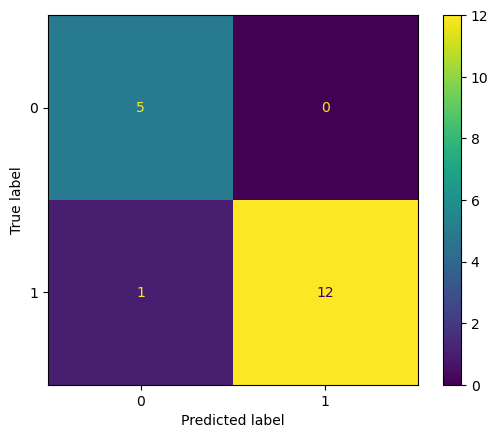

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=40,  # Increase the number of epochs
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy='epoch',
    learning_rate=1            #1e-5  
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    optimizers=(AdamW(model.parameters(), lr=1e-5), None)  # Use AdamW optimizer
)

predictions = trainer.predict(test_dataset)

predicted_labels = predictions.predictions.argmax(axis=0)

own_predicted_labels = np.where(predictions.predictions[:, 0] > predictions.predictions[:, 1], 0, 1)

#np.where(predictions[:, 0] > predictions[:, 1], 0, 1)

cm = confusion_matrix(labels_test, own_predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [90]:
predictions

PredictionOutput(predictions=array([[-4.952337 ,  5.0493884],
       [-2.394292 ,  2.3718576],
       [-5.0438075,  5.156636 ],
       [-4.724189 ,  4.8422427],
       [ 5.2602015, -5.2494845],
       [-5.040811 ,  5.1767216],
       [-5.0134077,  5.1311526],
       [-5.0299215,  5.1747656],
       [ 5.3380218, -5.318031 ],
       [ 5.332298 , -5.296445 ],
       [ 5.30994  , -5.320905 ],
       [-5.0388427,  5.1214676],
       [-4.9438953,  5.035487 ],
       [ 5.2795258, -5.2630005],
       [-5.0145636,  5.161049 ],
       [-5.0178995,  5.141307 ],
       [-4.8227553,  4.8959312],
       [ 5.3120704, -5.3124766]], dtype=float32), label_ids=array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32), metrics={'test_loss': 0.302

[43 76]


### Bert few-shot 

In [47]:
!pip install transformers
!pip install torch
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch

In [48]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

loading configuration file config.json from cache at /Users/anthonyivanier/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.24.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file model.safetensors from cache at /Users/anthonyivanier/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/model.safetensors

In [57]:
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            truncation=True,
            padding='max_length',
            max_length=512,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }
    def __len__(self):
        return len(self.texts)

In [62]:
df_combined['sex_binary']

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
5      0.0
6      0.0
7      0.0
8      1.0
9      1.0
10     0.0
11     1.0
12     1.0
13     1.0
14     0.0
15     0.0
16     1.0
17     NaN
18     0.0
19     1.0
20     1.0
21     0.0
22     1.0
23     1.0
24     0.0
25     1.0
26     0.0
27     1.0
28     0.0
29     0.0
30     0.0
31     1.0
32     0.0
33     0.0
34     1.0
35     0.0
36     0.0
37     1.0
38     0.0
39     1.0
40     1.0
41     1.0
42     1.0
43     0.0
44     0.0
45     1.0
46     0.0
47     1.0
48     1.0
49     0.0
50     0.0
51     1.0
52     0.0
53     1.0
54     1.0
55     1.0
56     1.0
57     1.0
58     0.0
59     NaN
60     0.0
61     1.0
62     0.0
63     0.0
64     1.0
65     0.0
66     1.0
67     1.0
68     1.0
69     0.0
70     0.0
71     1.0
72     0.0
73     0.0
74     1.0
75     0.0
76     0.0
77     1.0
78     1.0
79     1.0
80     1.0
81     1.0
82     0.0
83     0.0
84     0.0
85     0.0
86     1.0
87     1.0
88     0.0
89     1.0
90     0.0

In [58]:
'''
train_texts = [
    "nom: Chardon prénom: Marie date_naissance: 30 lieux_naissance: ",
    "nom: Lhopital prénom: Louis Jean date_naissance: 67 lieux_naissance: Sn employeur: ahef",
    "nom: Pyrin prénom: Marie date_naissance: 55 relation: d",
    "nom: Roy prénom: Antoine date_naissance: 51 lieux_naissance: P profession: métro"
]

# Convert labels to integers
label_mapping = {"Femme": 0, "Homme": 1}
train_labels = [label_mapping[label] for label in ["Femme", "Homme", "Femme", "Homme"]]
df_combined['sex_binary_int'] = df_combined['sex_binary'].astype(int)


train_dataset = MyDataset(train_texts, train_labels, tokenizer)
val_texts = df_combined['prediction'].tolist()
val_labels = df_combined['sex_binary_int'].tolist()

val_dataset = MyDataset(val_texts, val_labels, tokenizer)

train_dataset = MyDataset(train_texts, train_labels, tokenizer)'''


In [64]:
train_texts = [
    "nom: Chardon prénom: Marie date_naissance: 30 lieux_naissance: ",
    "nom: Lhopital prénom: Louis Jean date_naissance: 67 lieux_naissance: Sn employeur: ahef",
    "nom: Pyrin prénom: Marie date_naissance: 55 relation: d",
    "nom: Roy prénom: Antoine date_naissance: 51 lieux_naissance: P profession: métro"
]


label_mapping = {"Femme": 0, "Homme": 1}
train_labels = [label_mapping[label] for label in ["Femme", "Homme", "Femme", "Homme"]]


df_combined_no_nan['sex_binary_int'] = df_combined_no_nan['sex_binary'].astype(int)


train_dataset = MyDataset(train_texts, train_labels, tokenizer)
val_texts = df_combined_no_nan['prediction'].tolist()
val_labels = df_combined_no_nan['sex_binary_int'].tolist()
val_dataset = MyDataset(val_texts, val_labels, tokenizer)

/var/folders/g3/ll4cqtvn3yx5kfcbb8jfz_p40000gn/T/ipykernel_5652/1096317986.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_no_nan['sex_binary_int'] = df_combined_no_nan['sex_binary'].astype(int)


In [65]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,  
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=64,  
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [66]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    optimizers=(torch.optim.AdamW(model.parameters(), lr=1e-5), None)
)


In [67]:
result = trainer.evaluate()


***** Running Evaluation *****
  Num examples = 171
  Batch size = 64
100%|██████████| 3/3 [00:22<00:00,  7.65s/it]


In [71]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

result = trainer.evaluate()

print(result['eval_accuracy'])

***** Running Evaluation *****
  Num examples = 171
  Batch size = 64
100%|██████████| 3/3 [00:23<00:00,  7.69s/it]

0.4853801169590643


In [69]:
print(result['accuracy'])

KeyError: 'accuracy'